<a href="https://colab.research.google.com/github/BmB007/naanmudhalvan../blob/main/STOCK_MARKET_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed

Epoch 1/20



<ipython-input-47-a40766f6916d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)  # Ensure no missing values
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - loss: 0.0897 - val_loss: 0.0104
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0121 - val_loss: 0.0251
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0073 - val_loss: 0.0073
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0057 - val_loss: 0.0111
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0057 - val_loss: 0.0071
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0055 - val_loss: 0.0058
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0045 - val_loss: 0.0057
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0047 - val_loss: 0.0061
Epoch 9/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0045 - val_loss: 0.0072
Epoch 10/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0054 - val_loss: 0.0057
Epoch 11/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0044 - val_loss: 0.0072
Epoch 12/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0036 - val

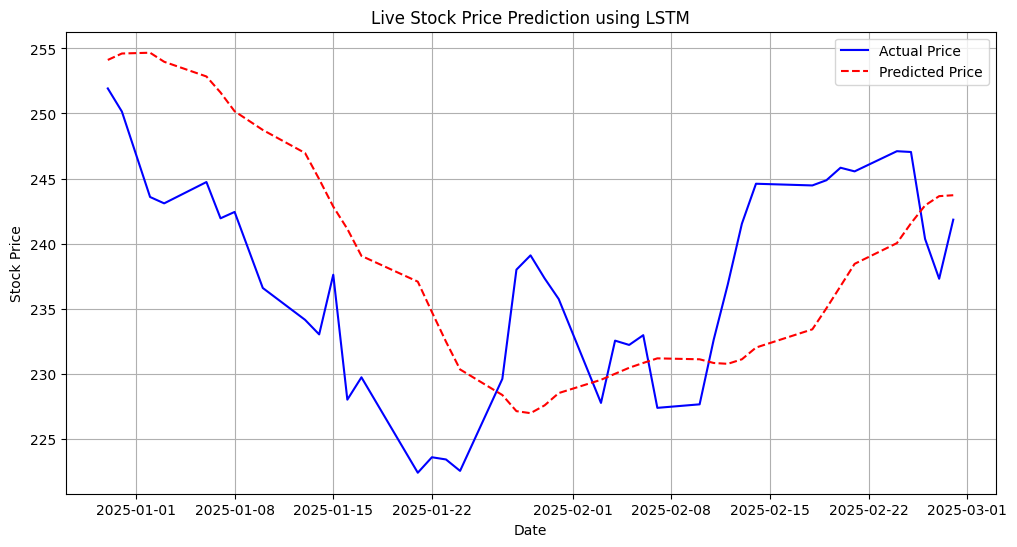

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import yfinance as yf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Fetch live stock data (Example: AAPL)
def fetch_live_data(ticker, period='2y', interval='1d'):
    stock_data = yf.download(ticker, period=period, interval=interval)
    return stock_data[['Close']]

# Load live data
data = fetch_live_data('AAPL')
data.dropna(inplace=True)  # Ensure no missing values

# Preprocess Data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

train_size = int(len(data_scaled) * 0.8)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences).reshape(-1, seq_length, 1), np.array(labels)

seq_length = 60  # 60 days of past data to predict next day's price
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Build LSTM Model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=25),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train Model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Make Predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Prepare dates for plotting
dates = data.index[-len(predicted_prices):]

# Plot Results
plt.figure(figsize=(12, 6))
plt.plot(dates, data['Close'].iloc[-len(predicted_prices):], label='Actual Price', color='blue')
plt.plot(dates, predicted_prices, label='Predicted Price', linestyle='dashed', color='red')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Live Stock Price Prediction using LSTM')
plt.grid()
plt.show()